In [12]:
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import googleapiclient.discovery
import datetime
from openai import OpenAI
import os
import pandas as pd


In [13]:
import methods #file containing functions to interact with Google calendar like add event, create event, etc
import json
import re

google_calendar = methods.get_google_calendar_service() #get the google calendar service
tasks = methods.get_task_service() #get the task service
tasks_list = methods.extractTasks(tasks)
calendar = methods.extractCalendar(google_calendar) #extract the calendar from the service
now = methods.current_time()

In [29]:
os.environ["OPENAI_API_KEY"] = 'sk-proj-AVCCrfTqbHBqX8KlZQyWT3BlbkFJmC4cEMITglxa17LJcK4L'
client = OpenAI()
client.api_key = 'sk-proj-AVCCrfTqbHBqX8KlZQyWT3BlbkFJmC4cEMITglxa17LJcK4L'


In [25]:
def chat_gpt(client, messages):
    response = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=messages,
        max_tokens=500
    )
    return response.choices[0].message.content


In [26]:
def get_conversation():
    filename = f"activity_log.txt"
    try:
        with open(filename, "r") as file:
            return file.read()
    except FileNotFoundError:
        return ""

conversation = get_conversation()

In [27]:
instruction = '''You are an expert in evaluating the responses of LLMs. Given the transcript of a conversation between a user and an LLM assistant, along with the system's prompts, evaluate and output the following metrics on a scale of 1-10:
Accuracy: How accurate is the assistant's response in the context of the user's prompt? Does the assistant correctly understand the user's intent?
Relevance: How relevant is the assistant response to the user's prompt?
Completeness: Do the responses fully address all parts of the user's request?
Coherence: How coherent is the assistant's response?
Consistency: Are the responses are consistent over time and do not contradict previous responses, especially in ongoing dialogues?
Engagement: How engaging and captivating are the responses? Can the assistant maintain the user's interest?
Tonality: Are the LLM assistant's responses polite and friendly?
Robustness: How well does the assistant handle edge cases or ambiguous inputs? The assistant should either respond appropriately or seek clarification without causing confusion or errors.
Overall: Overall, how would you rate the assistant's performance?
Take your time to read the entire transcript and think and evaluate the responses. Then output the scores. Do not provide feedback.
'''

In [37]:
# messages = [{"role": "system", "content": conversation},
#             {"role": "user", "content": instruction}]
# response = chat_gpt(client, messages)
# print(response)
response = "Accuracy: 4 Relevance: 4 Completeness: 4 Coherence: 4 Consistency: 3 Engagement: 5 Tonality: 7 Robustness: 4 Overall: 4"
print(response)

Accuracy: 4 Relevance: 4 Completeness: 4 Coherence: 4 Consistency: 3 Engagement: 5 Tonality: 7 Robustness: 4 Overall: 4


In [38]:
def parse_llm_output(output, model):
    """ Parses LLM output and adds an iteration number. """
    # Initialize an empty dictionary to store the metrics
    metrics = {'Model': model}

    # Split the output into lines and iterate over them
    for line in output.strip().split('\n'):
        key, value = line.split(':')
        key = key.strip()
        value = value.strip()

        # Handle non-numeric entries specially
        if value == "N/A":
            metrics[key] = None  # Use None to represent missing values in pandas
        else:
            metrics[key] = float(value)

    return metrics


In [56]:
#metrics = parse_llm_output(response, "GPT-3.5")
#llama2_metrics = parse_llm_output(response, "Llama2 with Ablations")
#mistral_metrics = parse_llm_output(response, "MistralAI")
#df = pd.DataFrame([metrics])
df = pd.read_csv('model_comparison.csv')
# new_row = pd.DataFrame([mistral_metrics])
# df = df.append(new_row)
# df

In [33]:
df.to_csv("model_comparison.csv", index=False)

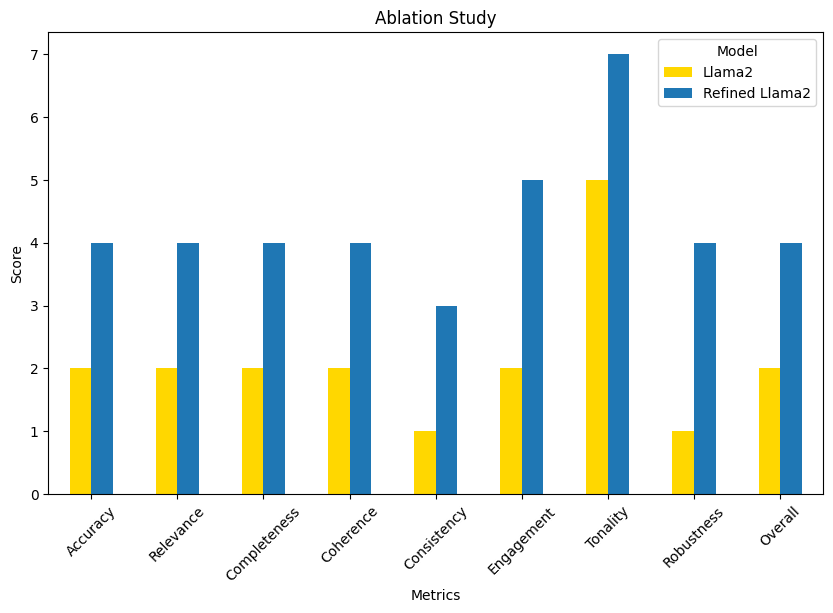

In [57]:
import matplotlib.pyplot as plt
from math import pi

# Set 'Model' as the index
df.set_index('Model', inplace=True)

# Transpose the DataFrame
df = df.transpose()

# Plot grouped bar chart

blue_color = '#1f77b4'
yellow_color = '#ffd700'

# Plot grouped bar chart with custom colors
df.plot(kind='bar', figsize=(10, 6), color=[yellow_color, blue_color])
plt.title('Ablation Study')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()